In [ ]:
# Paulo Victor Sales Araujo

# Exercícios 1

Você recebeu o arquivo **DEMOGRAFIA_FORTALEZA.csv**. Ele contém informações para a cidade de Fortaleza.

Utilize a latitude e longitude para plotar um gráfico bidimensional para cada bairro. Para cada ponto no gráfico, atribua-o as demais características numéricas.

Exemplo:

plt.figure(dpi=300)

fator=0.01 #numero positivo para reescalonar o tamanho do ponto

plt.title(variavel)

plt.scatter(df['Longitude (generated)'],df['Latitude (generated)'],c=df['variavel'],s=df['variavel']*fator)

plt.colorbar(label=variavel)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

In [2]:
!pip install --upgrade gdown

In [3]:
!gdown 1HQN37-Z8VtCY9PAelHhgYP6BhNI3i4e2

Downloading...
From: https://drive.google.com/uc?id=1HQN37-Z8VtCY9PAelHhgYP6BhNI3i4e2
To: /content/DEMOGRAFIA_FORTALEZA.csv
100% 15.0k/15.0k [00:00<00:00, 28.9MB/s]


In [4]:
df=pd.read_csv('DEMOGRAFIA_FORTALEZA.csv')
df=df.dropna(axis=1)
df=df.rename(columns={'Bairro.1':'BAIRRO'}).reset_index(drop=True)

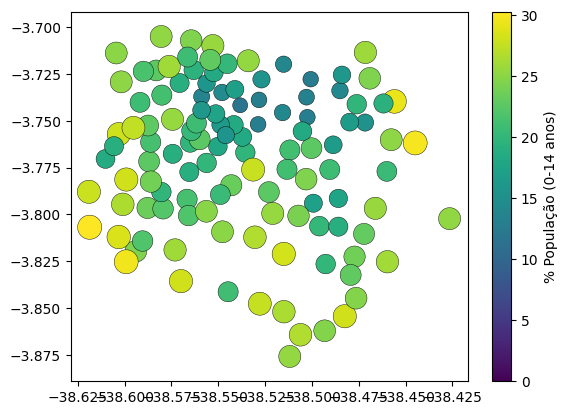

In [52]:
plt.figure(dpi=100)
plt.scatter(df['Longitude (generated)'],df['Latitude (generated)'],
            edgecolors='black',lw=0.3,c=df['% População (0-14 anos)'],
            s=10*df['% População (0-14 anos)'])
plt.axis('equal')
plt.colorbar(label='% População (0-14 anos)')

In [58]:
fortaleza_coords = [-3.7172, -38.5430]
mymap = folium.Map(location=fortaleza_coords, zoom_start=10)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude (generated)'], row['Longitude (generated)']],
                        radius=row['% População (0-14 anos)'] * 0.1,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.6,
                        popup='Population (0-14 years): ' + str(row['% População (0-14 anos)'])
                        ).add_to(mymap)

mymap

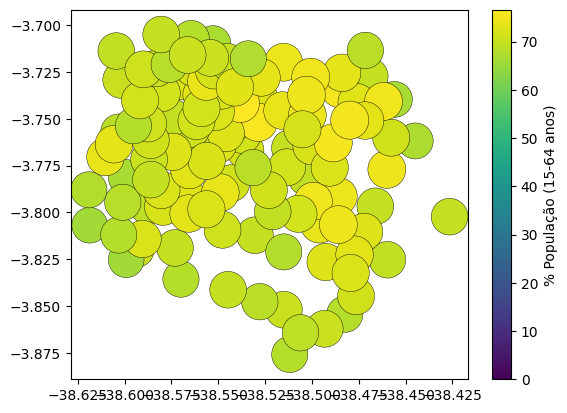

In [53]:
plt.figure(dpi=100)
plt.scatter(df['Longitude (generated)'],df['Latitude (generated)'],
            edgecolors='black',lw=0.3,c=df['% População (15-64 anos)'],
            s=10*df['% População (15-64 anos)'])
plt.axis('equal')
plt.colorbar(label='% População (15-64 anos)')

In [59]:
fortaleza_coords = [-3.7172, -38.5430]
mymap = folium.Map(location=fortaleza_coords, zoom_start=10)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude (generated)'], row['Longitude (generated)']],
                        radius=row['% População (15-64 anos)'] * 0.1,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.6,
                        popup='% População (15-64 anos): ' + str(row['% População (15-64 anos)'])
                        ).add_to(mymap)

mymap

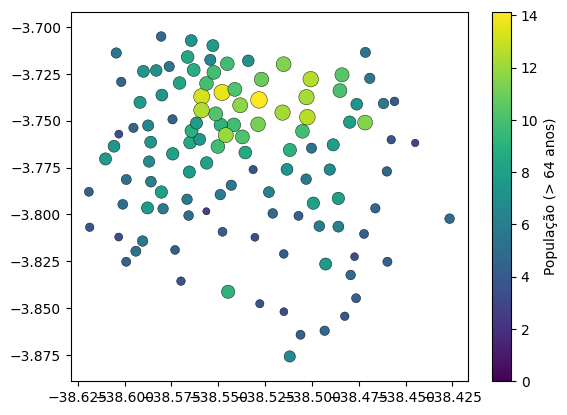

In [51]:
plt.figure(dpi=100)
plt.scatter(df['Longitude (generated)'],df['Latitude (generated)'],
            edgecolors='black',lw=0.3,c=df['% População (> 64 anos)'],
            s=10*df['% População (> 64 anos)'])
plt.axis('equal')
plt.colorbar(label='População (> 64 anos)')

In [64]:
fortaleza_coords = [-3.7172, -38.5430]
mymap = folium.Map(location=fortaleza_coords, zoom_start=10)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude (generated)'], row['Longitude (generated)']],
                        radius=row['População (> 64 anos)'] * 0.003,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.6,
                        popup='População (> 64 anos): ' + str(row['População (> 64 anos)'])
                        ).add_to(mymap)

mymap

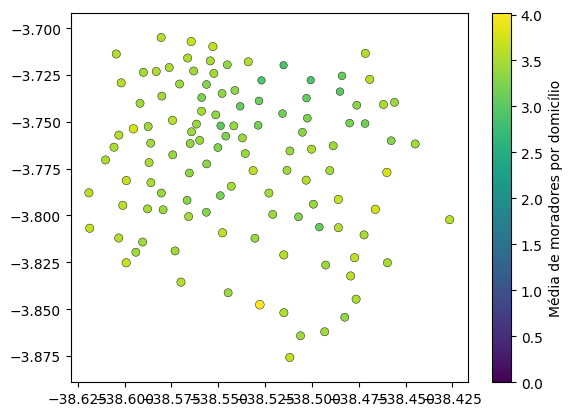

In [54]:
plt.figure(dpi=100)
plt.scatter(df['Longitude (generated)'],df['Latitude (generated)'],
            edgecolors='black',lw=0.3,c=df['Média de moradores por domicílio'],
            s=10*df['Média de moradores por domicílio'])
plt.axis('equal')
plt.colorbar(label='Média de moradores por domicílio')

In [67]:
fortaleza_coords = [-3.7172, -38.5430]
mymap = folium.Map(location=fortaleza_coords, zoom_start=10)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude (generated)'], row['Longitude (generated)']],
                        radius=row['Média de moradores por domicílio'] * 0.5,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.6,
                        popup='Média de moradores por domicílio: ' + str(row['Média de moradores por domicílio'])
                        ).add_to(mymap)

mymap

# Exercícios 2

Você recebeu o arquivo **DEMOGRAFIA_FORTALEZA.csv**. Ele contém informações para a cidade de Fortaleza. Em relação a todas as variaveis numéricas,faça:



1. Para cada variável numérica, faça um histograma destacando os limites superiores e inferiores para descoberta de elementos que estejam fora do padrão do dado (outliers). Calcule, para cada variável, o percentual de população resultante após remoção dos outliers. Quais bairros foram excluidos em cada processo? Quais bairros você não usaria na sua análise estatística? Classifique a assimetria e coeficiente de variação.

2. Calcule, para cada variável, o percentual de população resultante após remoção dos outliers considando o método de filtro em relação ao Desvio Padrão. Quais bairros foram excluidos em cada processo? Quais bairros você não usaria na sua análise estatística?

    a. desvio=1.0$\sigma$
    
    b. desvio=2.0$\sigma$



In [5]:
df

,BAIRRO,Regional,Cidade,Latitude (generated),Longitude (generated),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Média de moradores por domicílio,Parâmetro,Pop. Homens,Pop. Mulheres,População (0-14 anos),População (15-64 anos),População (> 64 anos)
0,Sapiranga/Coité,REGIONAL 6,Fortaleza,-3.796719,-38.466146,25.58,69.81,4.61,3.73,32158,15278,16880,8226,22449,1483
1,São Bento,REGIONAL 6,Fortaleza,-3.854319,-38.482456,28.05,68.16,3.79,3.36,11964,5771,6193,3356,8155,453
2,Sabiaguaba,REGIONAL 6,Fortaleza,-3.802250,-38.426503,25.32,69.82,4.87,3.59,2117,1043,1074,536,1478,103
3,Pedras,REGIONAL 6,Fortaleza,-3.875779,-38.511808,25.34,68.03,6.63,3.63,1342,670,672,340,913,89
4,Paupina,REGIONAL 6,Fortaleza,-3.862069,-38.493183,24.66,70.64,4.70,3.46,14665,7042,7623,3616,10360,689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Cristo Redentor,REGIONAL 1,Fortaleza,-3.707189,-38.564419,24.39,68.22,7.39,3.68,26717,12639,14078,6515,18227,1975
116,Carlito Pamplona,REGIONAL 1,Fortaleza,-3.717510,-38.554222,22.87,70.52,6.61,3.49,29076,13596,15480,6649,20504,1923
117,Barra do Ceará,REGIONAL 1,Fortaleza,-3.705033,-38.580445,25.23,69.94,4.83,3.56,72423,34658,37765,18271,50651,3501
118,Arraial Moura Brasil,REGIONAL 1,Fortaleza,-3.717998,-38.533952,25.42,67.46,7.12,3.55,3765,1796,1969,957,2540,268


In [6]:
df.describe()

,Latitude (generated),Longitude (generated),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Média de moradores por domicílio,Parâmetro,Pop. Homens,Pop. Mulheres,População (0-14 anos),População (15-64 anos),População (> 64 anos)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-3.771490,-38.537470,21.100485,69.494626,6.905223,3.337917,20434.875000,9565.983333,10868.891667,4614.016667,14475.966667,1344.891667
std,0.040350,0.045435,5.600674,11.413214,2.946024,0.568088,14872.191963,7115.162628,7775.361962,3938.645764,10362.789521,929.530457
min,-3.875779,-38.619017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.799730,-38.574302,18.362500,69.765000,4.617500,3.330000,10142.000000,4714.250000,5409.250000,1960.000000,7343.250000,685.500000
50%,-3.763673,-38.544928,21.315000,71.325000,6.695000,3.435000,15818.500000,7397.500000,8545.500000,3352.000000,11641.500000,1247.500000
75%,-3.739461,-38.500527,25.192500,72.902500,8.592500,3.540000,28096.250000,13143.000000,14985.250000,5833.000000,19792.750000,1848.750000
max,-3.705033,-38.426503,30.290000,76.632700,14.140000,4.020000,76044.000000,36555.000000,39489.000000,19726.000000,53187.000000,5174.000000


In [44]:
populacao_0_14=list(df['% População (0-14 anos)'].values)
populacao_15_64=list(df['% População (15-64 anos)'].values)
populacao_64=list(df['% População (> 64 anos)'].values)
media_moradores=list(df['Média de moradores por domicílio'].values)
parametro=list(df['Parâmetro'].values)
populacao_homens=list(df['Pop. Homens'].values)
populacao_mulheres=list(df['Pop. Mulheres'].values)

In [70]:
# metricas da variavel pop_0_14
media=np.array(populacao_0_14).mean()
nn=len(populacao_0_14)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(populacao_0_14[p1]+populacao_0_14[p2])/2
mediana
q1=pd.Series(populacao_0_14).quantile(0.25)
q3=pd.Series(populacao_0_14).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

8.117500000000003 35.4375 21.100484957475 18.04


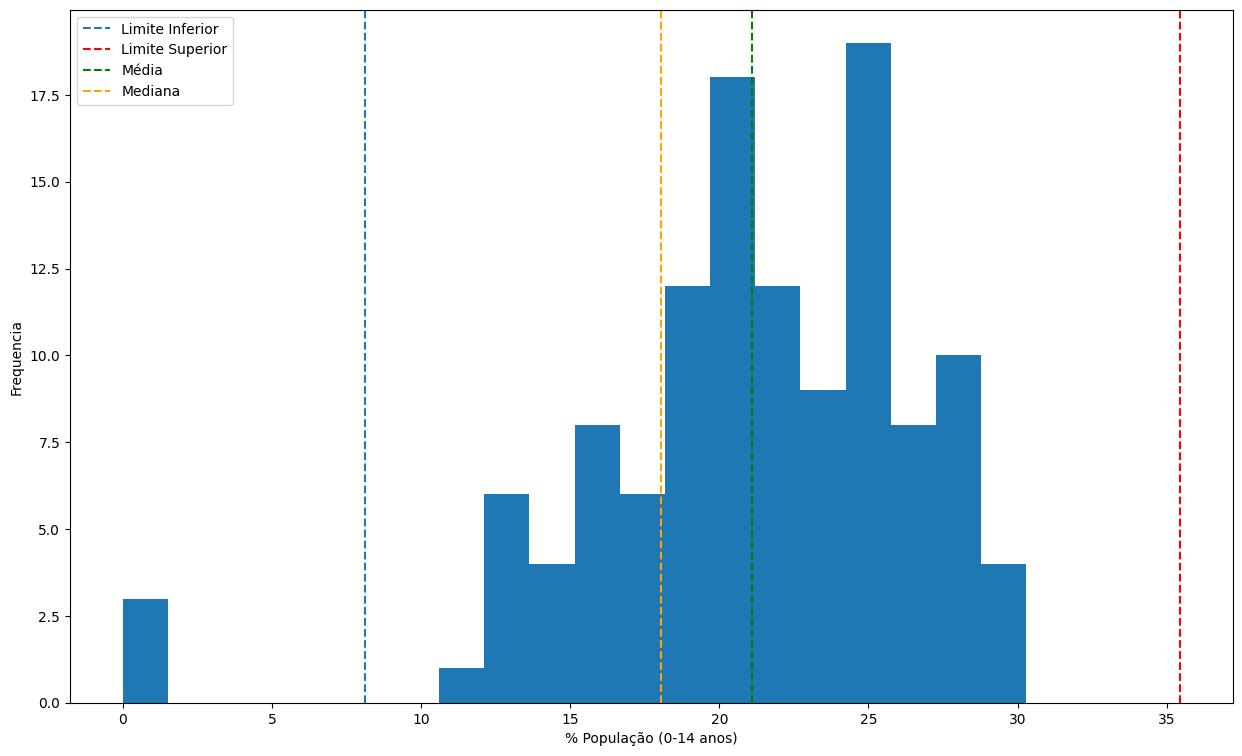

In [71]:
# histograma da variavel populacao_0_14
plt.figure(figsize=(15, 9))
plt.hist(populacao_0_14,bins=20)
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.xlabel('% População (0-14 anos)')
plt.ylabel('Frequencia')
plt.show()

In [72]:
# metricas da variavel pop_15_64
media=np.array(populacao_15_64).mean()
nn=len(populacao_15_64)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(populacao_15_64[p1]+populacao_15_64[p2])/2
q1=pd.Series(populacao_15_64).quantile(0.25)
q3=pd.Series(populacao_15_64).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

65.05875 77.60875000000001 69.49462559597501 73.135


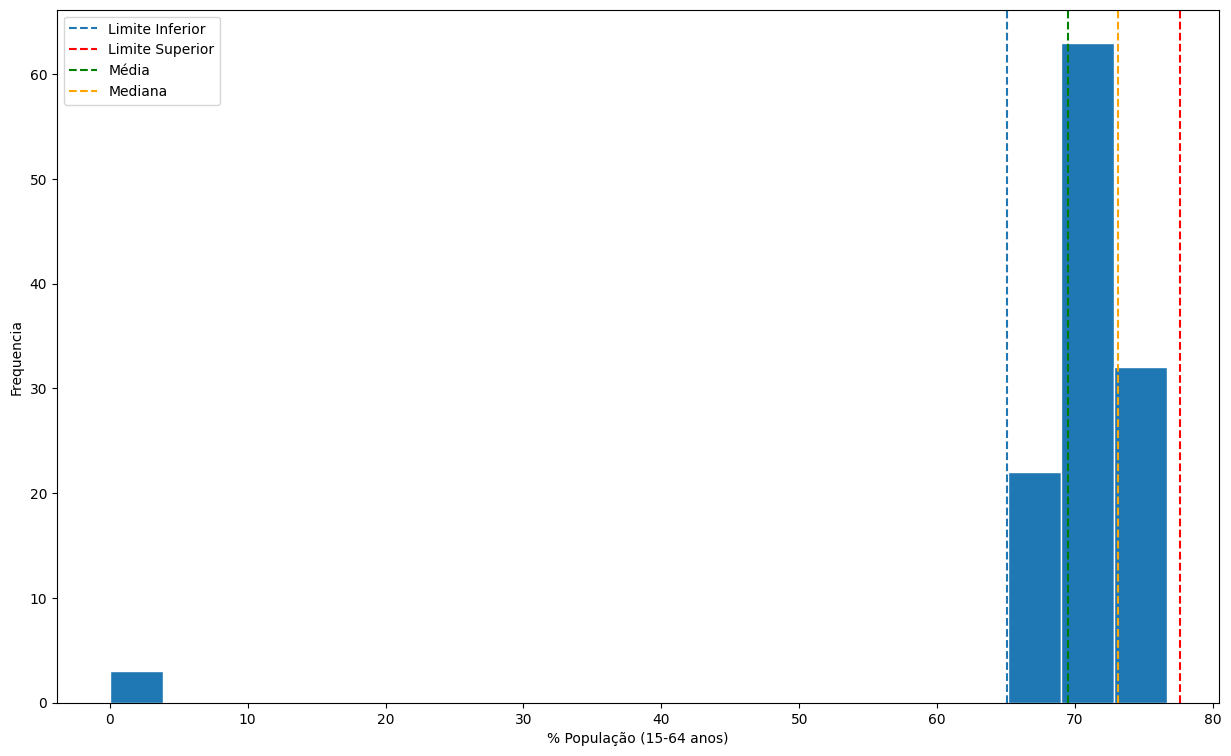

In [73]:
# histograma da variavel populacao_15_64
plt.figure(figsize=(15, 9))
plt.hist(populacao_15_64,bins=20,edgecolor='white')
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.xlabel('% População (15-64 anos)')
plt.ylabel('Frequencia')
plt.show()

In [74]:
# metricas da variavel populacao_64
media=np.array(populacao_64).mean()
nn=len(populacao_64)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(populacao_64[p1]+populacao_64[p2])/2
q1=pd.Series(populacao_64).quantile(0.25)
q3=pd.Series(populacao_64).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

-1.3449999999999998 14.555 6.905222779883333 8.82


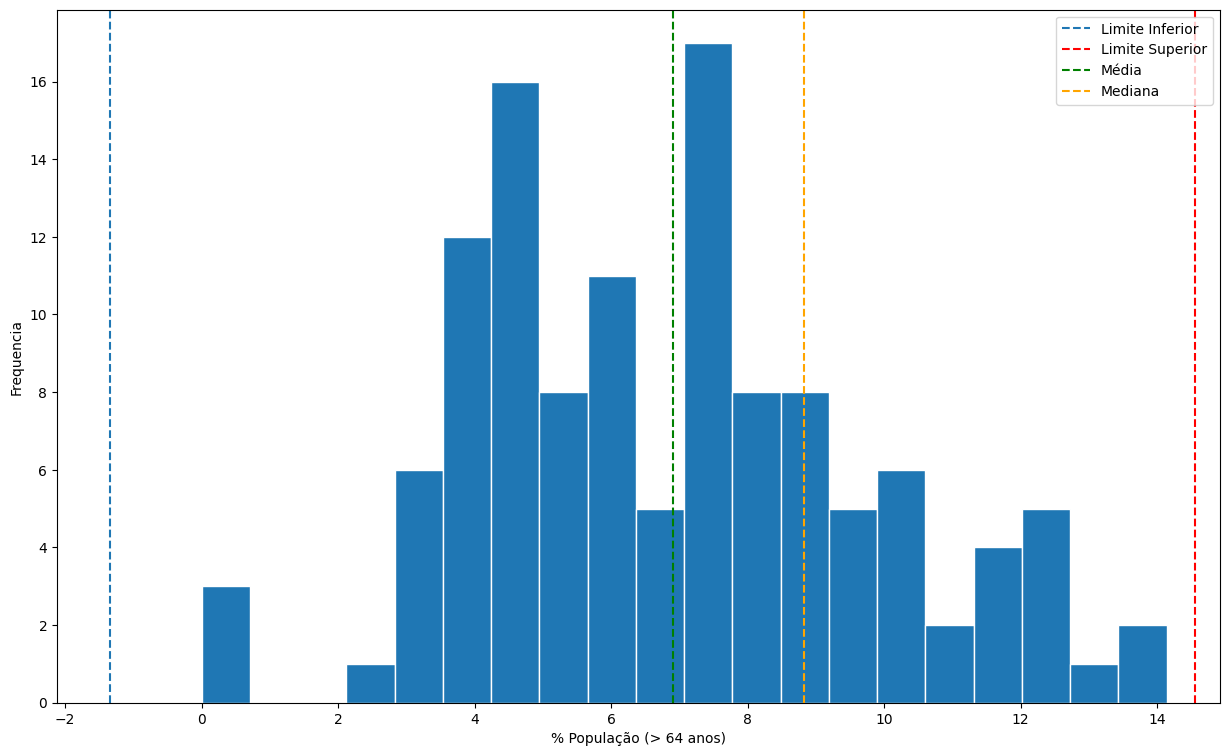

In [75]:
# histograma da variavel pop_plus_64
plt.figure(figsize=(15, 9))
plt.hist(populacao_64,bins=20,edgecolor='white')
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.xlabel('% População (> 64 anos)')
plt.ylabel('Frequencia')
plt.show()

In [76]:
# metricas da variavel media_moradores
media=np.array(media_moradores).mean()
nn=len(media_moradores)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(media_moradores[p1]+media_moradores[p2])/2
q1=pd.Series(media_moradores).quantile(0.25)
q3=pd.Series(media_moradores).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

3.015 3.855 3.337916666666666 3.2


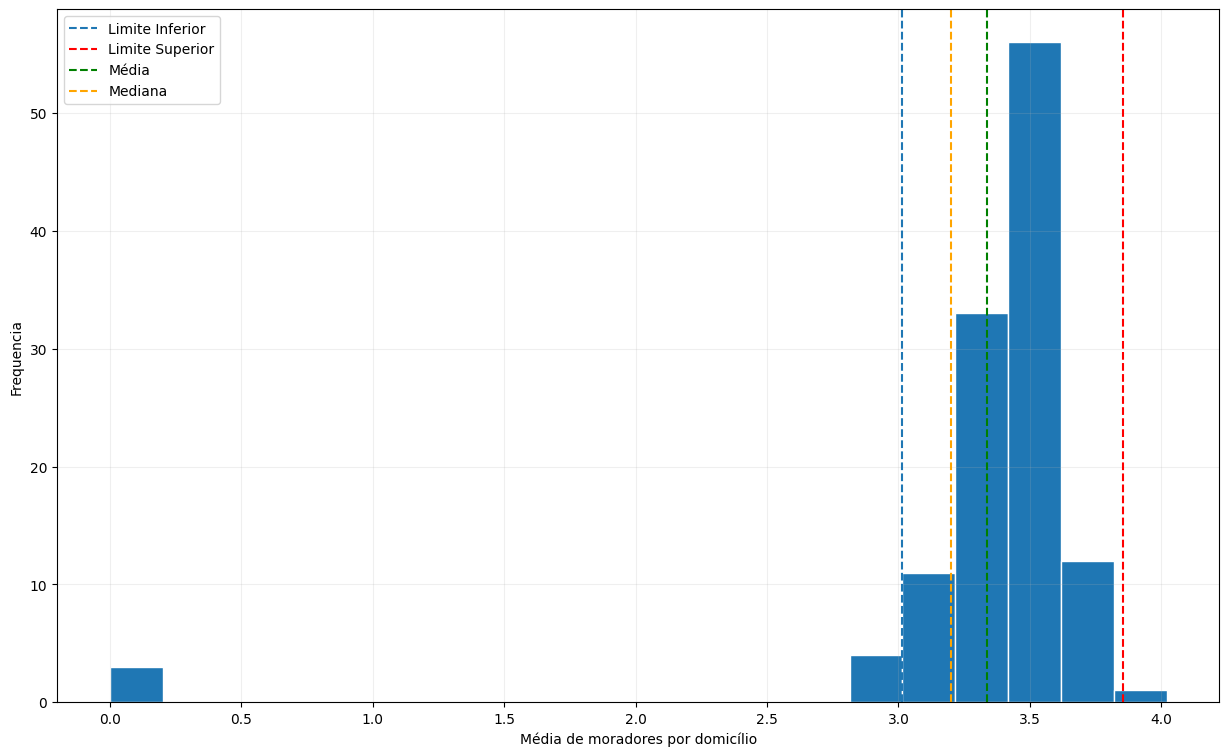

In [77]:
# histograma da variavel media_moradores
plt.figure(figsize=(15, 9))
plt.hist(media_moradores,bins=20,edgecolor='white')
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.grid(alpha=0.2)
plt.xlabel('Média de moradores por domicílio')
plt.ylabel('Frequencia')
plt.show()

In [78]:
# metricas da variavel parametro
media=np.array(parametro).mean()
nn=len(parametro)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(parametro[p1]+parametro[p2])/2
q1=pd.Series(parametro).quantile(0.25)
q3=pd.Series(parametro).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

-16789.375 55027.625 20434.875 10856.5


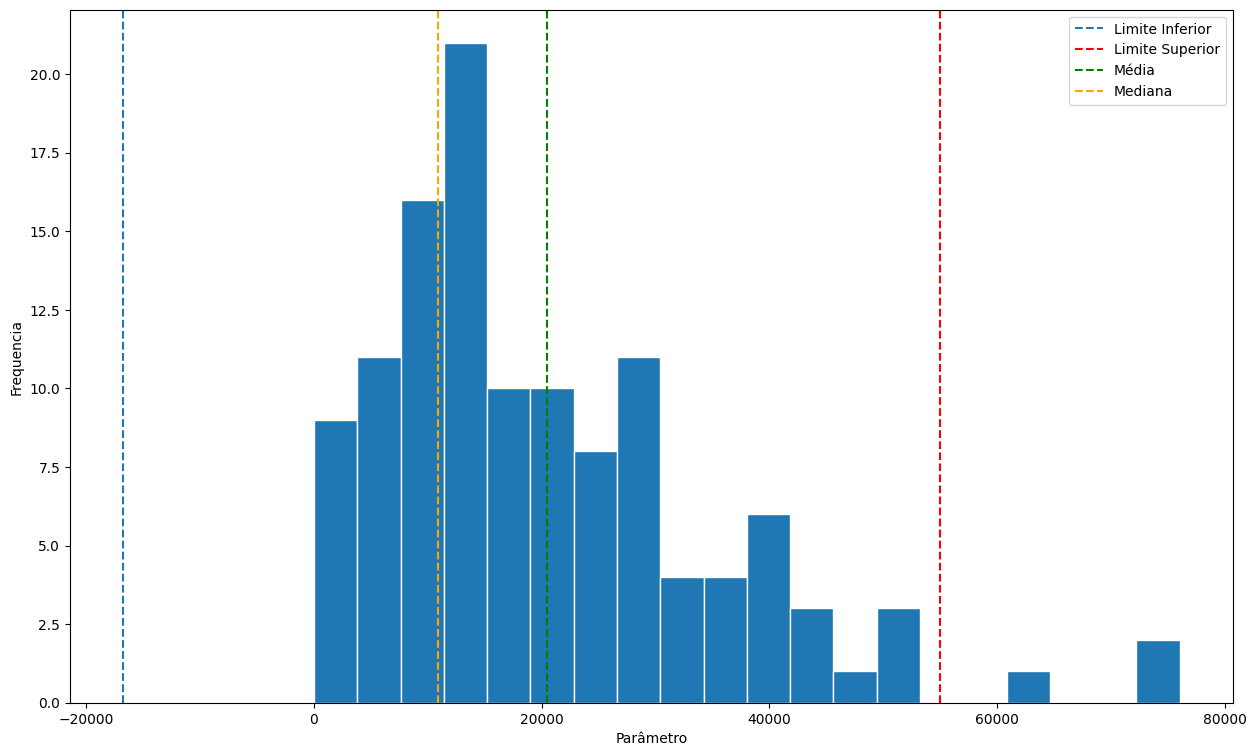

In [79]:
# histograma da variavel parametro
plt.figure(figsize=(15, 9))
plt.hist(parametro,bins=20,edgecolor='white')
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.xlabel('Parâmetro')
plt.ylabel('Frequencia')
plt.show()

In [80]:
# metricas da variavel populacao_homens
media=np.array(populacao_homens).mean()
nn=len(populacao_homens)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(populacao_homens[p1]+populacao_homens[p2])/2
q1=pd.Series(populacao_homens).quantile(0.25)
q3=pd.Series(populacao_homens).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

-7928.875 25786.125 9565.983333333334 4868.5


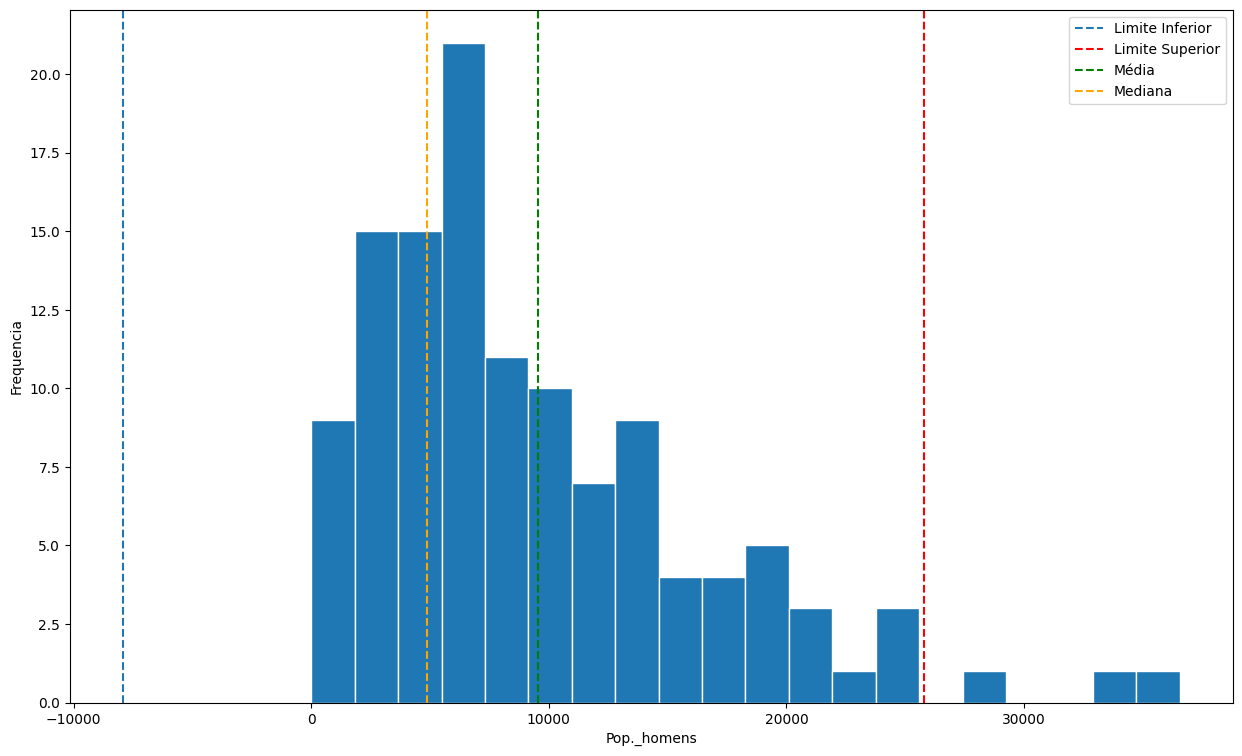

In [81]:
# histograma da variavel populacao_homens
plt.figure(figsize=(15, 9))
plt.hist(populacao_homens,bins=20,edgecolor='white')
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.xlabel('Pop._homens')
plt.ylabel('Frequencia')
plt.show()

In [82]:
# metricas da variavel populacao_mulheres
media=np.array(populacao_mulheres).mean()
nn=len(populacao_mulheres)
p1=int(nn/2 -1)
p2=int(nn/2)
mediana=(populacao_mulheres[p1]+populacao_mulheres[p2])/2
q1=pd.Series(populacao_mulheres).quantile(0.25)
q3=pd.Series(populacao_mulheres).quantile(0.75)
iqr=q3-q1
liminf=q1-1.5*iqr
limsup=q3+1.5*iqr
print(liminf,limsup,media,mediana)

-8954.75 29349.25 10868.891666666666 5988.0


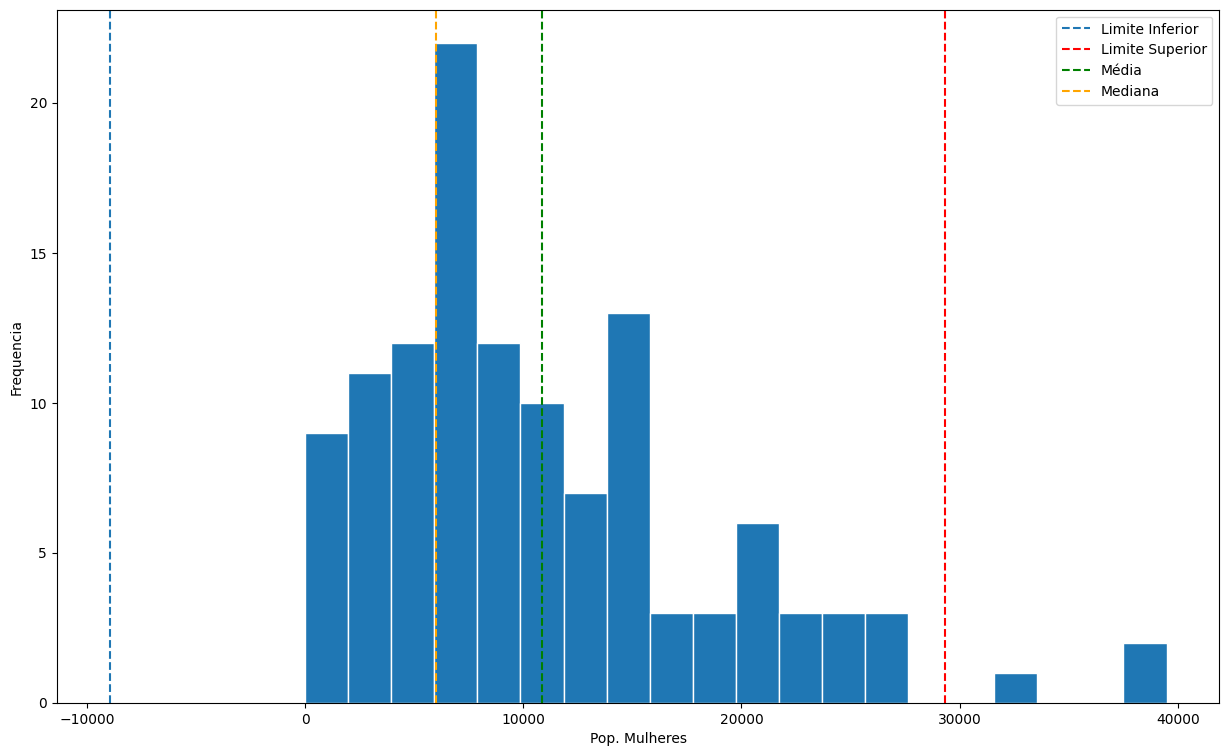

In [83]:
# histograma da variavel populacao_mulheres
plt.figure(figsize=(15, 9))
plt.hist(populacao_mulheres,bins=20,edgecolor='white')
plt.axvline(liminf,ls='--',label='Limite Inferior')
plt.axvline(limsup,ls='--',color='red',label='Limite Superior')
plt.axvline(media,ls='--',color='green',label='Média')
plt.axvline(mediana,ls='--',color='orange',label='Mediana')
plt.legend()
plt.xlabel('Pop. Mulheres')
plt.ylabel('Frequencia')
plt.show()